In [1]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import *
import re

In [2]:
data = read_csv('data.csv')

In [3]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [12]:
citylist = ['India', 'Hyderabad', 'Bangalore', 'Chennai', 'New Delhi', 'Mumbai']
cities = data[data['Location'].isin(citylist)]
cities

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,12,44964,New Delhi,04-03-2020,Beware of counterfeits trying to sell fake mas...,Extremely Negative
16,17,44969,Mumbai,05-03-2020,What Precautionary measures have you all taken...,Extremely Positive
230,231,45183,India,11-03-2020,We are disappointed that some sellers are att...,Extremely Negative
260,261,45213,India,11-03-2020,In pics | Shoppers around the world are headin...,Negative
320,321,45273,India,12-03-2020,BJP MP Subramanian Swamy has given Zero Hour n...,Neutral
364,365,45317,India,12-03-2020,"#coronavirus scare: In Kashmir, people say by...",Negative
403,404,45356,India,12-03-2020,"In a #CNBCTV18Exclusive chat, Praveer Sinha of...",Positive
616,617,45569,Hyderabad,12-03-2020,"Only China can do this, gratitude education ...",Extremely Positive
664,665,45617,Mumbai,12-03-2020,".@LME_news #metals , #CrudeOil prices down 5% ...",Negative
819,820,45772,Bangalore,12-03-2020,"All these years, ppl looked at me like a freak...",Positive


In [6]:
tweets = cities.filter(['OriginalTweet'])
tweets = tweets.astype('string')
tweets

,OriginalTweet
11,Beware of counterfeits trying to sell fake mas...
16,What Precautionary measures have you all taken...
230,We are disappointed that some sellers are att...
260,In pics | Shoppers around the world are headin...
320,BJP MP Subramanian Swamy has given Zero Hour n...
364,"#coronavirus scare: In Kashmir, people say by..."
403,"In a #CNBCTV18Exclusive chat, Praveer Sinha of..."
616,"Only China can do this, gratitude education ..."
664,".@LME_news #metals , #CrudeOil prices down 5% ..."
819,"All these years, ppl looked at me like a freak..."


In [16]:
tweets = tweets.astype(str)
tweets.rename(columns={'OriginalTweet': 'Tweets'}, inplace=True)

In [43]:
def clean(x):
    x = re.sub('@','',x)
    x = re.sub('t.co|amp','',x)
    x = re.sub('Covid19|coronavirus|Coronavirus|COVID','',x)
    x = re.sub('#|_','',x)
    x = re.sub('https?|:','',x)
    return x
tweets['Tweets'] = tweets['Tweets'].apply(clean)
tweets

,Tweets
11,Beware of counterfeits trying to sell fake mas...
16,What Precautionary measures have you all taken...
230,We are disappointed that some sellers are att...
260,In pics | Shoppers around the world are headin...
320,BJP MP Subramanian Swamy has given Zero Hour n...
364,"scare In Kashmir, people say bye bye to Chi..."
403,"In a CNBCTV18Exclusive chat, Praveer Sinha of ..."
616,"Only China can do this, gratitude education ..."
664,".LMEnews metals , CrudeOil prices down 5% as ..."
819,"All these years, ppl looked at me like a freak..."


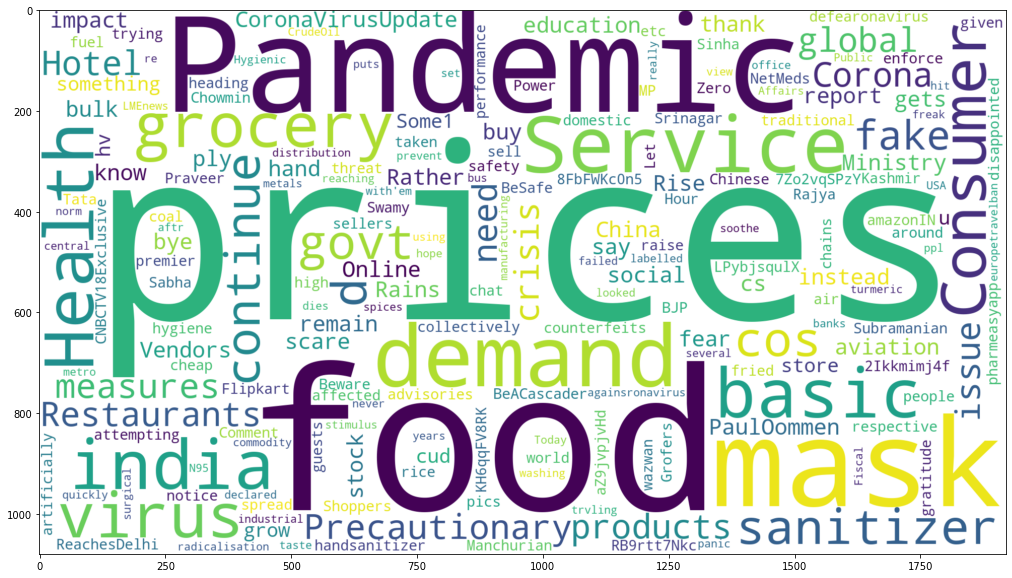

In [52]:
all = ' '.join([i for i in tweets['Tweets']])
wordcloud = WordCloud(width=1920,height=1080,random_state=30, background_color='white').generate(all)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.savefig('plot.png')